In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
source_data = pd.read_csv('../data/source_data.csv')
handle_data = pd.read_csv('../data/handle_data.csv')
df = pd.read_excel('../data/word frequency list 60000 English.xlsx')

In [4]:
temp_data = pd.read_excel('../data/temp_data.xlsx', usecols=['Word', 'rank', 'class'])
temp_data

,Word,rank,class
0,excel,NaN,C2
1,infer,13463.0,C2
2,undue,9949.0,C2
3,prime,780.0,C2
4,sneak,NaN,C2
...,...,...,...
358,slump,9797.0,NaN
359,NaN,NaN,NaN
360,NaN,NaN,NaN
361,NaN,NaN,NaN


In [5]:
# 如果‘class’中的数据为NAN，则看rank是否为NAN，如果rank为NAN，则class为D2，否则为D1
for i in range(len(temp_data)):
    if pd.isna(temp_data.loc[i, 'class']):
        if pd.isna(temp_data.loc[i, 'rank']):
            temp_data.loc[i, 'class'] = 'D2'
        else:
            temp_data.loc[i, 'class'] = 'D1'


In [6]:
temp_data.to_csv('../data/temp_data.csv', index=False)

In [7]:
# 将temp_data中的class转换为数字
temp_data['class'] = temp_data['class'].map({'A1': 1, 'A2': 2, 'B1': 3, 'B2': 4, 'C1': 5, 'C2': 6, 'D1': 7, 'D2': 8})
temp_data

,Word,rank,class
0,excel,NaN,6
1,infer,13463.0,6
2,undue,9949.0,6
3,prime,780.0,6
4,sneak,NaN,6
...,...,...,...
358,slump,9797.0,7
359,NaN,NaN,8
360,NaN,NaN,8
361,NaN,NaN,8


In [8]:
letter_data = pd.read_csv('../data/letter.csv', index_col=0)
temp_data.to_csv('../data/temp_data.csv', index=False)

In [9]:
# 计算letter value
source_data['letter occupancy'] = 0
for i in range(len(source_data)):
    word = source_data.loc[i, 'Word']
    word = list(word)
    value = 0
    for j in range(len(word)):
        value += letter_data.loc[word[j], 'Position ' + str(j + 1)]
    source_data.loc[i, 'letter occupancy'] = value

source_data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),letter occupancy
0,2022/1/7,202,slump,80630,1362,1,3,23,39,24,9,1,0.379423
1,2022/1/8,203,crank,101503,1763,1,5,23,31,24,14,2,0.456704
2,2022/1/9,204,gorge,91477,1913,1,3,13,27,30,22,4,0.458566
3,2022/1/10,205,query,107134,2242,1,4,16,30,30,17,2,0.375698
4,2022/1/11,206,drink,153880,3017,1,9,35,34,16,5,1,0.390363
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022/12/27,556,condo,20879,2012,0,2,17,35,29,14,3,0.347998
355,2022/12/28,557,impel,20160,1937,0,3,21,40,25,9,1,0.258380
356,2022/12/29,558,havoc,20001,1919,0,2,16,38,30,12,2,0.269088
357,2022/12/30,559,molar,21204,1973,0,4,21,38,26,9,1,0.385475


In [10]:
def norm_(y_s):
    temp = [1, 2, 3, 4, 5, 6, 7]
    # data_为0个1， 1个2， 9个3， 29个4， 34个5， 22个6， 5个7
    datas = []
    for i, j in enumerate(y_s):
        datas.extend([temp[i]] * j)
    mu = np.mean(datas)
    sigma = np.std(datas)
    return mu, sigma, datas

source_data['mu'] = 0
source_data['sigma'] = 0

for i in range(len(source_data)):
    y_s = [source_data['1 try'][i], source_data['2 tries'][i], source_data['3 tries'][i], source_data['4 tries'][i], source_data['5 tries'][i], source_data['6 tries'][i], source_data['7 or more tries (X)'][i]]

    mu, sigma, datas = norm_(y_s)
    source_data.loc[i, 'mu'] = mu
    source_data.loc[i, 'sigma'] = sigma

In [11]:
source_data.drop(['Number of  reported results', 'Number in hard mode'], axis=1, inplace=True)

In [12]:
# 计算 try value
source_data['score'] = 0
for i in range(len(source_data)):
    score = 1 * source_data.loc[i, '1 try'] + 2 * source_data.loc[i, '2 tries'] + 3 * source_data.loc[i, '3 tries'] + 4 * source_data.loc[i, '4 tries'] + 5 * source_data.loc[i, '5 tries'] + 6 * source_data.loc[i, '6 tries'] + 7 * source_data.loc[i, '7 or more tries (X)']
    source_data.loc[i, 'score'] = score

In [13]:
source_data.drop(['1 try', '2 tries', '3 tries', '4 tries', '5 tries', '6 tries', '7 or more tries (X)'], axis=1, inplace=True)

In [14]:
source_data['frequency'] = 0
for i in range(len(source_data)):
    word = source_data.loc[i, 'Word']
    frequency = handle_data.loc[handle_data['Word'] == word, 'frequency'].values[0]
    source_data.loc[i, 'frequency'] = frequency

In [15]:
source_data
temp_data

,Word,rank,class
0,excel,NaN,6
1,infer,13463.0,6
2,undue,9949.0,6
3,prime,780.0,6
4,sneak,NaN,6
...,...,...,...
358,slump,9797.0,7
359,NaN,NaN,8
360,NaN,NaN,8
361,NaN,NaN,8


In [16]:
source_data['class'] = 0
for i in range(len(source_data)):
    word = source_data.loc[i, 'Word']
    class_ = temp_data.loc[temp_data['Word'] == word, 'class'].values
    if len(class_) == 0:
        class_ = 8
    else:
        class_ = class_[0]
    source_data.loc[i, 'class'] = class_


In [17]:
eerie_letter_oc = (0.430867 - source_data['letter occupancy'].min()) / (source_data['letter occupancy'].max() - source_data['letter occupancy'].min())
eerie_frequency = (2272 - source_data['frequency'].min()) / (source_data['frequency'].max() - source_data['frequency'].min())
eerie_class = (7 - source_data['class'].min()) / (source_data['class'].max() - source_data['class'].min())

In [18]:
# 将 letter occupany、score、frequency 、class进行归一化
source_data['letter occupancy'] = (source_data['letter occupancy'] - source_data['letter occupancy'].min()) / (source_data['letter occupancy'].max() - source_data['letter occupancy'].min())
source_data['score'] = (source_data['score'] - source_data['score'].min()) / (source_data['score'].max() - source_data['score'].min())
source_data['frequency'] = (source_data['frequency'] - source_data['frequency'].min()) / (source_data['frequency'].max() - source_data['frequency'].min())
source_data['class'] = (source_data['class'] - source_data['class'].min()) / (source_data['class'].max() - source_data['class'].min())

In [19]:
# 将letter occupancy、frequency、class作为特征 score作为标签, 用于训练模型
X = source_data[['letter occupancy', 'frequency', 'class']]
Y = source_data['score']

In [29]:
# 用于训练模型
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_poisson_deviance

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# 训练模型
model = LinearRegression()
model.fit(X_train, y_train)
# 预测
y_pred = model.predict(X_test)
# 求线性回归的loss曲线
loss = []
for i in range(len(y_test)):
    loss.append((y_test.values[i] - y_pred[i]) ** 2)

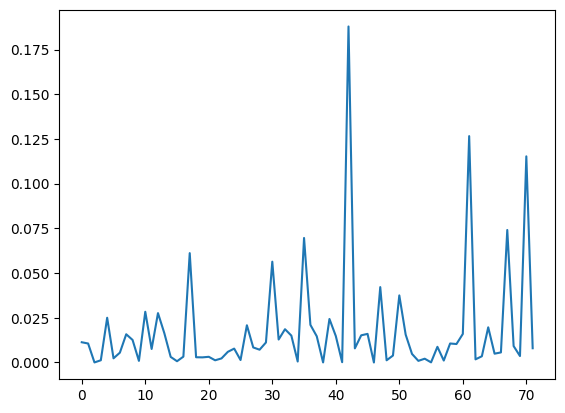

In [30]:
# 绘制loss曲线
import matplotlib.pyplot as plt
plt.plot(loss)
plt.show()


In [21]:

# 评估模型
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('R2: %.2f' % r2_score(y_test, y_pred))
print('EVS: %.2f' % explained_variance_score(y_test, y_pred))
print('MSLE: %.2f' % mean_squared_log_error(y_test, y_pred))
print('MdAE: %.2f' % median_absolute_error(y_test, y_pred))
print('ME: %.2f' % max_error(y_test, y_pred))
print('MPD: %.2f' % mean_poisson_deviance(y_test, y_pred))

# 模型权重
print('模型权重: ', model.coef_)
# 模型截距
print('模型截距: ', model.intercept_)


MSE: 0.02
RMSE: 0.13
MAE: 0.11
R2: 0.05
EVS: 0.05
MSLE: 0.01
MdAE: 0.09
ME: 0.43
MPD: 0.05
模型权重:  [-0.10909621 -0.17007549  0.09175316]
模型截距:  0.37544925497874493


In [22]:
source_data['difficult'] = 0
for i in range(len(source_data)):
    source_data.loc[i, 'difficult'] = model.coef_[0] * source_data.loc[i, 'letter occupancy'] + model.coef_[1] * source_data.loc[i, 'frequency'] + model.coef_[2] * source_data.loc[i, 'class'] + model.intercept_

source_data

,Date,Contest number,Word,letter occupancy,mu,sigma,score,frequency,class,difficult
0,2022/1/7,202,slump,0.523169,4.130000,1.055036,0.356401,0.004210,0.857143,0.396303
1,2022/1/8,203,crank,0.688590,4.220000,1.204824,0.387543,0.002907,1.000000,0.391586
2,2022/1/9,204,gorge,0.692576,4.640000,1.212601,0.532872,0.001674,0.857143,0.378253
3,2022/1/10,205,query,0.515197,4.430000,1.176903,0.460208,0.002145,0.428571,0.358201
4,2022/1/11,206,drink,0.546587,3.732673,1.079889,0.231834,0.045307,0.000000,0.308113
...,...,...,...,...,...,...,...,...,...,...
354,2022/12/27,556,condo,0.455904,4.450000,1.080509,0.467128,0.002540,1.000000,0.417033
355,2022/12/28,557,impel,0.264076,4.191919,1.001784,0.363322,0.000458,1.000000,0.438315
356,2022/12/29,558,havoc,0.286996,4.400000,1.019804,0.449827,0.001422,0.857143,0.422543
357,2022/12/30,559,molar,0.536124,4.181818,1.028519,0.359862,0.000332,0.857143,0.395549


In [23]:
eerie_difficult = model.coef_[0] * eerie_letter_oc + model.coef_[1] * eerie_frequency + model.coef_[2] * eerie_class + model.intercept_
eerie_difficult

0.3846853968430463

In [24]:
# 将拟合平面和数据点画出
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_test['letter occupancy'], X_test['frequency'], X_test['class'], color='blue')
ax.scatter(X_test['letter occupancy'], X_test['frequency'], X_test['class'], color='red')
ax.set_xlabel('letter occupancy')
ax.set_ylabel('frequency')
ax.set_zlabel('score')
plt.show()
fig.savefig('score.png')

<Figure size 640x480 with 0 Axes>

In [25]:
source_data.to_csv('../data/output_data.csv', index=False)